In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import stats
import pdb
import json
from math import sqrt

In [54]:
file_csv = '/Users/liufanling/Library/CloudStorage/OneDrive-Personal/1 UC DAVIS/CSRA/Outputs/Folicacid_Organoids_T2_KSZ_Sara/Network/Compiled_Networks.csv'

data_df = pd.read_csv(file_csv)

In [55]:
df = data_df.replace(np.NaN,0.0)
df

,Run_ID,DIV,Well,NeuronType,Time,Chip_ID,mean_IBI,cov_IBI,mean_Burst_Peak,cov_Burst_Peak,...,cov_Burst_Peak_Abs,mean_BurstDuration,cov_BurstDuration,MeanNetworkISI,CoVNetworkISI,MeanWithinBurstISI,CoVWithinBurstISI,MeanOutsideBurstISI,CoVOutsideBurstISI,Fanofactor
0,9,107,1,Control WTC,5/30/24 16:59,M07293,0.000000,0.000000,0.000000,0.000000,...,181.425487,0.000000,0.0,5.129944,323.540520,0.000000,0.000000,0.000000,0.000000,15.756981
1,9,107,2,Folinic WTC,5/30/24 16:59,M07293,13.363636,71.954875,3.847241,8.854792,...,212.172949,0.952174,0.0,2.141277,300.880844,0.112671,101.254394,0.168558,112.117518,246.947347
2,9,107,3,FAE WTC,5/30/24 16:59,M07293,0.000000,0.000000,0.000000,0.000000,...,138.090246,0.000000,0.0,5.410488,197.876875,0.000000,0.000000,0.000000,0.000000,5.557955
3,9,107,4,B12 WTC,5/30/24 16:59,M07293,55.140000,6.296233,4.406359,0.783751,...,280.610776,2.983333,0.0,2.317033,423.988798,0.155672,102.332068,0.241531,85.269432,272.283238
4,9,107,5,B12 WTC,5/30/24 16:59,M07293,0.000000,0.000000,0.000000,0.000000,...,256.229528,0.000000,0.0,3.859732,263.177891,0.000000,0.000000,0.000000,0.000000,11.963295
5,9,107,6,Folinic STEM,5/30/24 16:59,M07293,0.000000,0.000000,0.000000,0.000000,...,34.413179,0.000000,0.0,0.998424,448.728588,0.000000,0.000000,0.000000,0.000000,0.960889
6,6,107,2,Folinic WTC,5/30/24 16:13,M08035,0.000000,0.000000,0.000000,0.000000,...,76.057060,0.000000,0.0,3.516990,247.524614,0.000000,0.000000,0.000000,0.000000,7.283333
7,6,107,3,FAE WTC,5/30/24 16:13,M08035,0.000000,0.000000,0.000000,0.000000,...,179.310691,0.000000,0.0,4.281828,385.507036,0.000000,0.000000,0.000000,0.000000,3.922053
8,6,107,5,FAE STEM,5/30/24 16:13,M08035,0.000000,0.000000,0.000000,0.000000,...,22.742458,0.000000,0.0,5.439970,151.772936,0.000000,0.000000,0.000000,0.000000,1.093097
9,6,107,6,Folinic STEM,5/30/24 16:13,M08035,0.000000,0.000000,0.000000,0.000000,...,38.887498,0.000000,0.0,1.293719,120.526831,0.000000,0.000000,0.000000,0.000000,0.977229


In [56]:
div = df['DIV'].unique()
print(div)

# def extract_min_value(div):
#     return int(div.split('-')[0])

# df['DIV_sort'] = df['DIV'].apply(extract_min_value)
# df = df.sort_values(by=['DIV_sort']).reset_index(drop=True)
# df = df.drop(columns=['DIV_sort'])
# div = df['DIV'].unique()
# print(div)

[107 112 118 125 132]


In [57]:
chip_id = df['Chip_ID'].unique()
print(chip_id)

['M07293' 'M08035' 'M05506']


## Without outlier removal

In [58]:
df.columns

Index(['Run_ID', 'DIV', 'Well', 'NeuronType', 'Time', 'Chip_ID', 'mean_IBI',
       'cov_IBI', 'mean_Burst_Peak', 'cov_Burst_Peak', 'Number_Bursts',
       'mean_Spike_per_Burst', 'cov_Spike_per_Burst', 'mean_Burst_Peak_Abs',
       'cov_Burst_Peak_Abs', 'mean_BurstDuration', 'cov_BurstDuration',
       'MeanNetworkISI', 'CoVNetworkISI', 'MeanWithinBurstISI',
       'CoVWithinBurstISI', 'MeanOutsideBurstISI', 'CoVOutsideBurstISI',
       'Fanofactor'],
      dtype='object')

In [59]:
# subset the data only consider the following neuron types: Control WTC, Folinic WTC, FAE WTC, B12 WTC
df = df[df['NeuronType'].isin(['Control WTC',  'FAE WTC','Folinic WTC', 'B12 WTC'])]
df.head()

,Run_ID,DIV,Well,NeuronType,Time,Chip_ID,mean_IBI,cov_IBI,mean_Burst_Peak,cov_Burst_Peak,...,cov_Burst_Peak_Abs,mean_BurstDuration,cov_BurstDuration,MeanNetworkISI,CoVNetworkISI,MeanWithinBurstISI,CoVWithinBurstISI,MeanOutsideBurstISI,CoVOutsideBurstISI,Fanofactor
0,9,107,1,Control WTC,5/30/24 16:59,M07293,0.000000,0.000000,0.000000,0.000000,...,181.425487,0.000000,0.0,5.129944,323.540520,0.000000,0.000000,0.000000,0.000000,15.756981
1,9,107,2,Folinic WTC,5/30/24 16:59,M07293,13.363636,71.954875,3.847241,8.854792,...,212.172949,0.952174,0.0,2.141277,300.880844,0.112671,101.254394,0.168558,112.117518,246.947347
2,9,107,3,FAE WTC,5/30/24 16:59,M07293,0.000000,0.000000,0.000000,0.000000,...,138.090246,0.000000,0.0,5.410488,197.876875,0.000000,0.000000,0.000000,0.000000,5.557955
3,9,107,4,B12 WTC,5/30/24 16:59,M07293,55.140000,6.296233,4.406359,0.783751,...,280.610776,2.983333,0.0,2.317033,423.988798,0.155672,102.332068,0.241531,85.269432,272.283238
4,9,107,5,B12 WTC,5/30/24 16:59,M07293,0.000000,0.000000,0.000000,0.000000,...,256.229528,0.000000,0.0,3.859732,263.177891,0.000000,0.000000,0.000000,0.000000,11.963295


In [64]:
df['NeuronType'] = df['NeuronType'].str.strip()
unique_genotypes = df['NeuronType'].unique()
#unique_genotypes =['WT cortex','HET cortex']
print(unique_genotypes)

unique_genotypes = ['Control WTC', 'FAE WTC', 'Folinic WTC', 'B12 WTC']

['Control WTC' 'Folinic WTC' 'FAE WTC' 'B12 WTC']


/var/folders/hz/mtvvz9t52kxgqcx423vlrhx00000gn/T/ipykernel_14721/3744296215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NeuronType'] = df['NeuronType'].str.strip()


Number of unique Genotypes: 4
['Control WTC', 'FAE WTC', 'Folinic WTC', 'B12 WTC']


/Users/liufanling/miniconda3/envs/my_env_39/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/liufanling/miniconda3/envs/my_env_39/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/hz/mtvvz9t52kxgqcx423vlrhx00000gn/T/ipykernel_14721/2651339095.py:132: RuntimeWarning: invalid value encountered in scalar divide
  t_stat = (mean1 - mean2) / sed


Number of unique Genotypes: 4
['Control WTC', 'FAE WTC', 'Folinic WTC', 'B12 WTC']


/Users/liufanling/miniconda3/envs/my_env_39/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/liufanling/miniconda3/envs/my_env_39/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/hz/mtvvz9t52kxgqcx423vlrhx00000gn/T/ipykernel_14721/2651339095.py:132: RuntimeWarning: invalid value encountered in scalar divide
  t_stat = (mean1 - mean2) / sed


Number of unique Genotypes: 4
['Control WTC', 'FAE WTC', 'Folinic WTC', 'B12 WTC']


/Users/liufanling/miniconda3/envs/my_env_39/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/liufanling/miniconda3/envs/my_env_39/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/hz/mtvvz9t52kxgqcx423vlrhx00000gn/T/ipykernel_14721/2651339095.py:132: RuntimeWarning: invalid value encountered in scalar divide
  t_stat = (mean1 - mean2) / sed


Number of unique Genotypes: 4
['Control WTC', 'FAE WTC', 'Folinic WTC', 'B12 WTC']


/Users/liufanling/miniconda3/envs/my_env_39/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/liufanling/miniconda3/envs/my_env_39/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/hz/mtvvz9t52kxgqcx423vlrhx00000gn/T/ipykernel_14721/2651339095.py:132: RuntimeWarning: invalid value encountered in scalar divide
  t_stat = (mean1 - mean2) / sed


Number of unique Genotypes: 4
['Control WTC', 'FAE WTC', 'Folinic WTC', 'B12 WTC']


/Users/liufanling/miniconda3/envs/my_env_39/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/liufanling/miniconda3/envs/my_env_39/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/hz/mtvvz9t52kxgqcx423vlrhx00000gn/T/ipykernel_14721/2651339095.py:132: RuntimeWarning: invalid value encountered in scalar divide
  t_stat = (mean1 - mean2) / sed


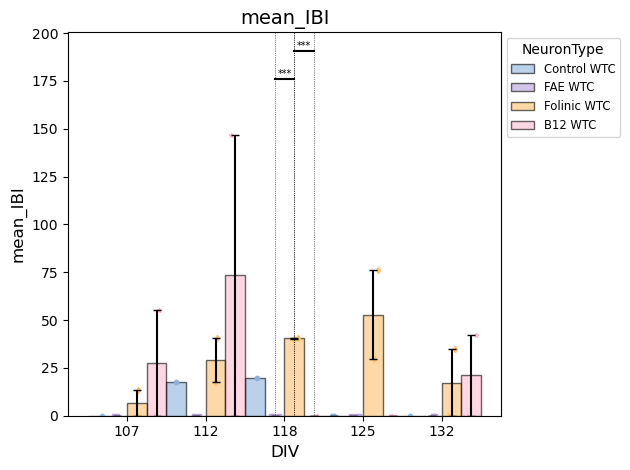

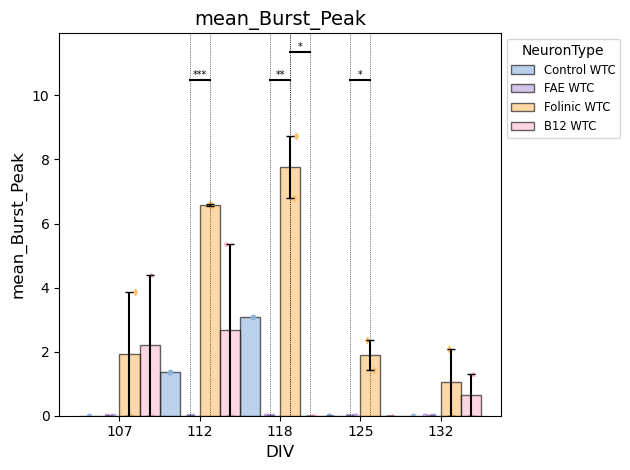

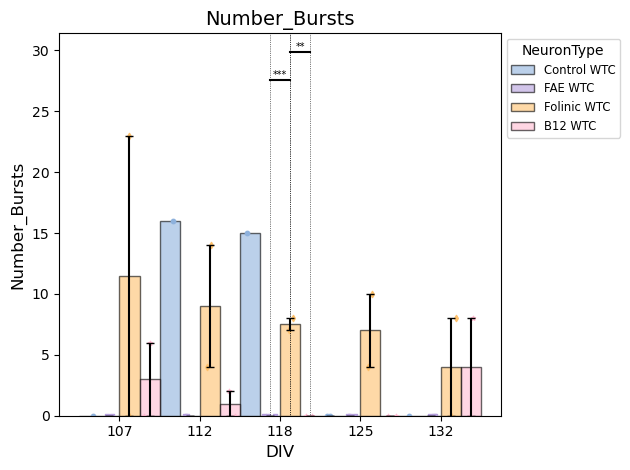

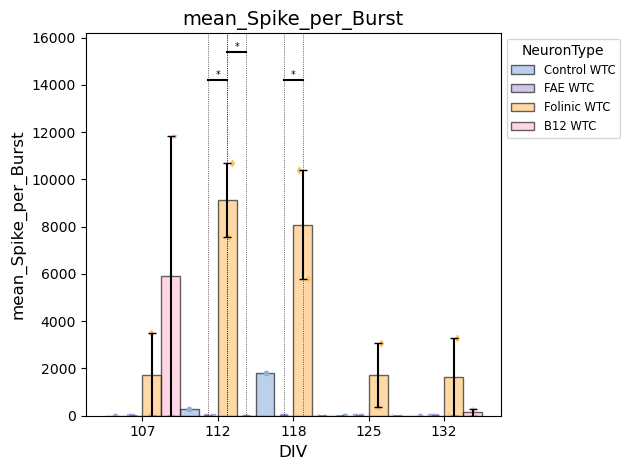

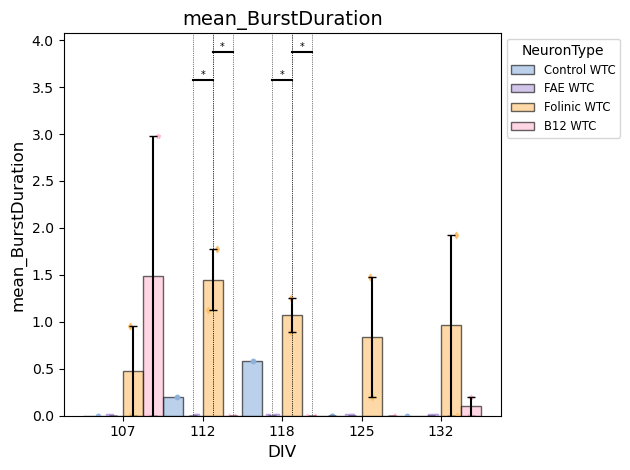

In [65]:
output_types = ['mean_IBI'
    , 'mean_Burst_Peak',  'Number_Bursts',
       'mean_Spike_per_Burst',
     'mean_BurstDuration']

colors = ['#8EB1DC','#B59FDC','#FEC16C', '#FFBBD1']
markers = ['o','s','d','*']



dirpath = '/Users/liufanling/Library/CloudStorage/OneDrive-Personal/1 UC DAVIS/CSRA/Outputs/Folicacid_Organoids_T2_KSZ_Sara/Network/plot_notebook'
for output_type in output_types:
    total_genotypes = len(unique_genotypes)
    #output_type='Number_Bursts'
    # Print the number of unique genotypes
    print(f"Number of unique Genotypes: {total_genotypes}")

    # Initialize output arrays for each unique genotype
    output_arrays = {genotype: [] for genotype in unique_genotypes}
    chip_arrays = {genotype: [] for genotype in unique_genotypes}
    well_arrays = {genotype: [] for genotype in unique_genotypes}
    print(unique_genotypes)
    # Fill data from data frame
    for i in div:
        for genotype in unique_genotypes:
            temp_df = df.loc[(df['DIV'] == i) &
                            (df['NeuronType'].str.strip() == genotype)
                            ]
            output_arrays[genotype].append(np.array(temp_df[output_type]))
            chip_arrays[genotype].append(np.array(temp_df['Chip_ID']))
            well_arrays[genotype].append(np.array(temp_df['Well']))
    #print(df)
    # Adjust bar width and gap between them
    bar_width = 0.25  # Adjust as necessary for your specific plot
    gap_between_bars = 0  # Adjust the gap between bars within a group

    # Calculate the total width for all bars in a group
    total_bar_group_width = total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars

    # Create x-coordinates of bars for each genotype group
    x_genotype = {genotype: [] for genotype in unique_genotypes}
    base_x_coordinate = np.arange(len(div))  # Base x-coordinates for each group
    offset = (total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars) / 2
    centered_x = base_x_coordinate - offset + bar_width / 2
    for i, genotype in enumerate(unique_genotypes):
        x_genotype[genotype] = centered_x + i * (bar_width + gap_between_bars)



    # Initialize plot
    fig, ax = plt.subplots()
    # Generate a list of distinct colors based on the number of genotypes
    #colors = [plt.colormaps['Set1'](i) for i in np.linspace(0, 1, len(unique_genotypes))]# Using a colormap to generate colors
    #colors2 = [plt.colormaps['Set2'](i) for i in np.linspace(0, 1, len(unique_genotypes))]#
    # marker_shapes = ['^', 's', 'v', 'D', '+', 'x', '*', 'H', '8']
    # marker_chips={chip:marker_shapes[idx] for idx, chip in enumerate(track_chips)}
    # Plot data for each genotype
    mean_data_all ={}
    yerr_data_all = {}
    n_data_all={}
    #breakpoint()
    #pdb.set_trace()
    for i,genotype in enumerate(unique_genotypes):
        #breakpoint()
        y_data = output_arrays[genotype]
        chipy_data = chip_arrays[genotype]
        welly_data = well_arrays[genotype]
        #print("type: ",type(genotype))
        # Calculate statistics
        mean_data = [np.mean([n for n in yi if np.isfinite(n)]) for yi in y_data]
        yerr_data = [np.std([n for n in yi if np.isfinite(n)], ddof=1)/np.sqrt(np.size(yi)) for yi in y_data]
        n_data = [len(yi) for yi in y_data]
        # Store statistics in dictionaries
        mean_data_all[genotype] = mean_data
        yerr_data_all[genotype] = yerr_data
        n_data_all[genotype] = n_data
        
            
        # Plot bars
        #transparency value 
        alpha_value = 0.5
        ax.bar(x_genotype[genotype], mean_data, yerr=yerr_data, capsize=3, width=bar_width, color=colors[i], edgecolor='black', ecolor='black', label=genotype,alpha=0.6)

        #pdb.set_trace()
        # Plot scatter points
        #breakpoint()
        for j in range(len(x_genotype[genotype])):
            #pdb.set_trace()
            # ax.scatter(x_genotype[genotype][j] + np.zeros(y_data[j].size), y_data[j], s=20,color=colors2[i],marker=marker_chips[chipy_data[j]+str(welly_data[j])] if chipy_data[j]+str(welly_data[j]) in track_chips else 'o')
    # Concatenate corresponding elements from chipy_data[j] and welly_data[j]
            combined_data = [str(chip)+ str(well) for chip, well in zip(chipy_data[j], welly_data[j])]

            # # Check if the concatenated string is in track_chips, and set the marker accordingly
            # markers = [marker_chips.get(chipwell, 'o') for chipwell in combined_data]
            # #marker_chips[combined_data[0]] if combined_data[0] in track_chips else 'o'

            # Use the marker in the scatter plot
            jitter_amount=0.07
            for k in range(len(y_data[j])):
                #pdb.set_trace()
                ax.scatter(
                    x_genotype[genotype][j] + np.random.uniform(-jitter_amount, jitter_amount, 1),
                    y_data[j][k],
                    s=10,
                    color=colors[i],
                    marker=markers[i]
                        )


    # # Calculate maximum y-value for plotting significance
    # max_y = max([max(data) for data in output_arrays.values() if data.size > 0])
    # increment = max_y * 0.1  # Increment to adjust y-position for significance markers

    #Perform and plot t-tests between all pairs of genotype
    #pdb.set_trace()
    for i in range(len(base_x_coordinate)):
        # Retrieve non-empty arrays and calculate their maximum values
        non_empty_arrays = [array for genotype_arrays in output_arrays.values() for array in genotype_arrays if len(array) > 0]
        if non_empty_arrays:  # Check if there are any non-empty arrays
            maxim = max(max(array) for array in non_empty_arrays)
        else:
            maxim = 0  # Or set a default value if all arrays are empty

        count = 1
        p_values = []
        for j, genotype1 in enumerate(unique_genotypes):
            for k, genotype2 in enumerate(unique_genotypes):
                if j < k:
                    mean1, sem1, n1 = mean_data_all[genotype1][i], yerr_data_all[genotype1][i], n_data_all[genotype1][i]
                    mean2, sem2, n2 = mean_data_all[genotype2][i], yerr_data_all[genotype2][i], n_data_all[genotype2][i]
                    sed = sqrt(sem1**2.0 + sem2**2.0)
                    t_stat = (mean1 - mean2) / sed
                    degreef = n1 + n2 - 2
                    alpha = 0.05
                    cv = stats.t.ppf(1.0 - alpha, degreef)
                    p_value = (1.0 - stats.t.cdf(abs(t_stat), degreef)) * 2.0
                    p_values.append([mean1, sem1, mean2, sem2, p_value])

                    x1, x2 = x_genotype[genotype1][i], x_genotype[genotype2][i]
                    sign = "***" if p_value <= 0.001 else "**" if p_value <= 0.01 else "*" if p_value <= 0.05 else "ns"
                    if sign != 'ns':
                        ax.plot([x1, x2], [maxim + 0.05*maxim*(count)] * 2, 'k', linewidth=1.5)
                        ax.text((x1 + x2) / 2, maxim +0.05*maxim*(count), sign, ha='center', va='bottom', fontsize=7)
                        ax.axvline(x1, color='black', linestyle=':', linewidth=0.5)
                        ax.axvline(x2, color='black', linestyle=':', linewidth=0.5)
                    count += 1


                    


   # Adjustments for plot aesthetics
    plt.title(f"{output_type}", fontsize=14)
    plt.xlabel('DIV', fontsize=12)
    plt.ylabel(f"{output_type}", fontsize=12)
    plt.xticks(base_x_coordinate, div, fontsize=10)
    plt.legend(title='NeuronType', loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
    plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
    # #plt.legend(title='NeuronType',loc='upper right', fontsize='x-small', handlelength=2, handletextpad=2, handleheight=2,bbox_to_anchor=(1.0, 1))
    import os 
    
    if not os.path.exists(dirpath):
            os.makedirs(dirpath)
    plt.savefig(f"{dirpath}/{output_type}.png",dpi=300,format='png')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

output_types = ['mean_IBI', 'mean_Burst_Peak', 'Number_Bursts', 'mean_Spike_per_Burst', 'mean_BurstDuration']
colors = ['#8EB1DC','#FEC16C','#B59FDC','#FFBBD1']  # Colors for 'Control WTC', 'FAE WTC', 'Folinic WTC'
markers = ['o','s','d','*']

dirpath = '/Users/liufanling/Library/CloudStorage/OneDrive-Personal/1 UC DAVIS/CSRA/Outputs/Folicacid_Organoids_T2_KSZ_Sara/Network/plot_notebook'
if not os.path.exists(dirpath):
    os.makedirs(dirpath)

# Load data and define unique_genotypes and div as needed
# Assuming df is already loaded with your data
for output_type in output_types:
    # Corrected order of genotypes
    unique_genotypes = ['Control WTC', 'FAE WTC', 'Folinic WTC', 'B12 WTC']
    total_genotypes = len(unique_genotypes)
    print(f"Number of unique Genotypes: {total_genotypes}")
    print(unique_genotypes)

    output_arrays = {genotype: [] for genotype in unique_genotypes}
    chip_arrays = {genotype: [] for genotype in unique_genotypes}
    well_arrays = {genotype: [] for genotype in unique_genotypes}

    for i in div:
        for genotype in unique_genotypes:
            temp_df = df.loc[(df['DIV'] == i) & (df['NeuronType'].str.strip() == genotype)]
            output_arrays[genotype].append(np.array(temp_df[output_type]))
            chip_arrays[genotype].append(np.array(temp_df['Chip_ID']))
            well_arrays[genotype].append(np.array(temp_df['Well']))

    bar_width = 0.25
    gap_between_bars = 0.1
    group_spacing = 1.5
    total_bar_group_width = total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars
    base_x_coordinate = np.arange(len(div)) * (total_bar_group_width + group_spacing)
    offset = (total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars) / 2
    centered_x = base_x_coordinate - offset + bar_width / 2

    x_genotype = {genotype: centered_x + i * (bar_width + gap_between_bars) for i, genotype in enumerate(unique_genotypes)}
    fig, ax = plt.subplots()

    for i, genotype in enumerate(unique_genotypes):
        y_data = output_arrays[genotype]
        mean_data = [np.mean([n for n in yi if np.isfinite(n)]) for yi in y_data]
        yerr_data = [np.std([n for n in yi if np.isfinite(n)], ddof=1) / np.sqrt(np.size(yi)) for yi in y_data]

        ax.bar(x_genotype[genotype], mean_data, yerr=yerr_data, capsize=3, width=bar_width, color=colors[i], edgecolor='black', ecolor='black', label=genotype, alpha=0.6)
        jitter_amount = 0.07
        for j in range(len(x_genotype[genotype])):
            for k in range(len(y_data[j])):
                ax.scatter(
                    x_genotype[genotype][j] + np.random.uniform(-jitter_amount, jitter_amount, 1),
                    y_data[j][k],
                    s=10,
                    color=colors[i],
                    marker=markers[i]
                )

    plt.title(f"{output_type}", fontsize=14)
    plt.xlabel('DIV', fontsize=12)
    plt.ylabel(output_type, fontsize=12)
    plt.xticks(base_x_coordinate, div, fontsize=10)
    plt.legend(title='NeuronType', loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
    plt.tight_layout()
    plt.savefig(f"{dirpath}/{output_type}.png", dpi=300, format='png')


## With the outlier removal

In [62]:
df.columns

Index(['Run_ID', 'DIV', 'Well', 'NeuronType', 'Time', 'Chip_ID', 'mean_IBI',
       'cov_IBI', 'mean_Burst_Peak', 'cov_Burst_Peak', 'Number_Bursts',
       'mean_Spike_per_Burst', 'cov_Spike_per_Burst', 'mean_Burst_Peak_Abs',
       'cov_Burst_Peak_Abs', 'mean_BurstDuration', 'cov_BurstDuration',
       'MeanNetworkISI', 'CoVNetworkISI', 'MeanWithinBurstISI',
       'CoVWithinBurstISI', 'MeanOutsideBurstISI', 'CoVOutsideBurstISI',
       'Fanofactor'],
      dtype='object')

In [63]:
#exclude chips

#maxtwo exclude
exclude_list = [('M06815', 2)]

if exclude_list:
    # Using list comprehension for filtering
    print("hello")
    mask = [(row.Chip_ID, row.Well) in exclude_list for index, row in df.iterrows()]
    df = df[~pd.Series(mask)]

hello


/var/folders/hz/mtvvz9t52kxgqcx423vlrhx00000gn/T/ipykernel_14721/3315637145.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~pd.Series(mask)]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
print(df[['Chip_ID', 'Well']].drop_duplicates())

   Chip_ID  Well
0   M07295     1
1   M06815     3
2   M06815     4
3   M06815     5
4   M06815     6
6   M07429     5
7   M07429     4
8   M06815     1
9   M07429     2
10  M07429     1
11  M07295     6
12  M07295     5
13  M07295     4
14  M07295     3
15  M07295     2
16  M07429     3


In [ ]:
print(df['NeuronType'].unique())

['WT' 'HET']


In [ ]:
colors = ['royalblue','indianred']
markers=['s','o']

Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']


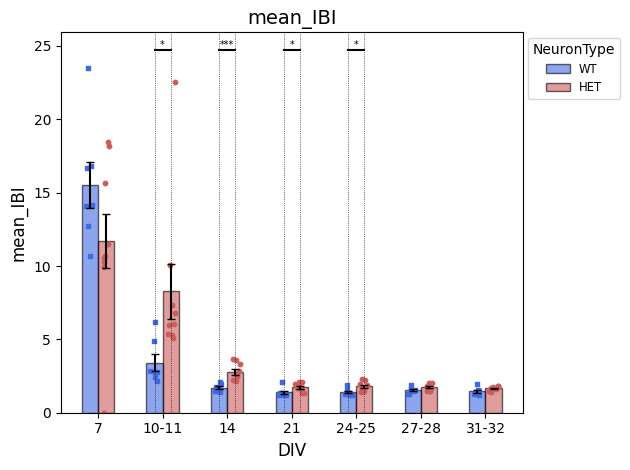

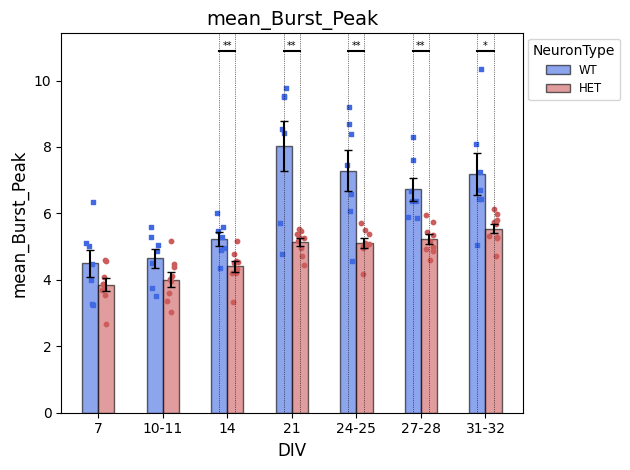

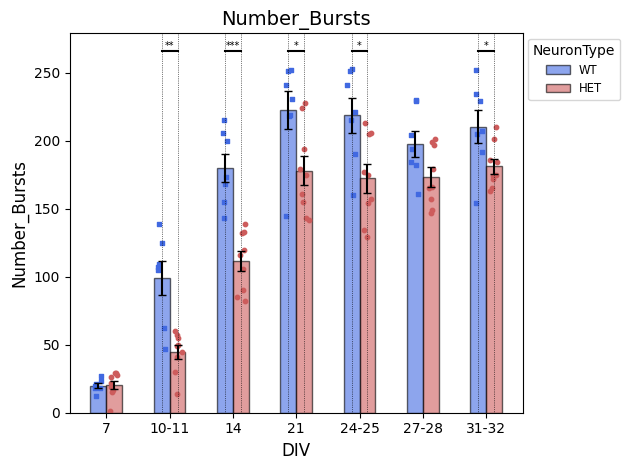

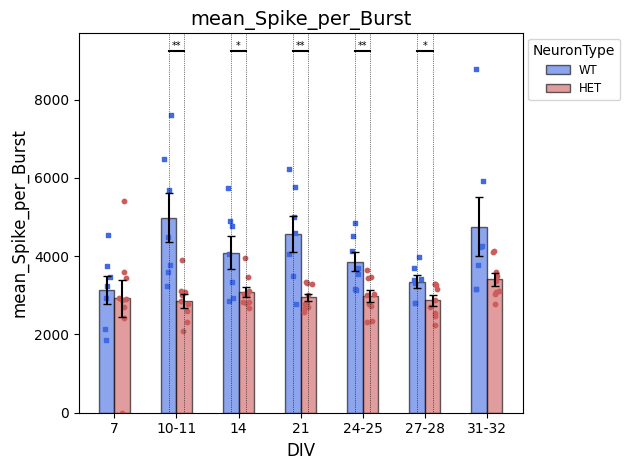

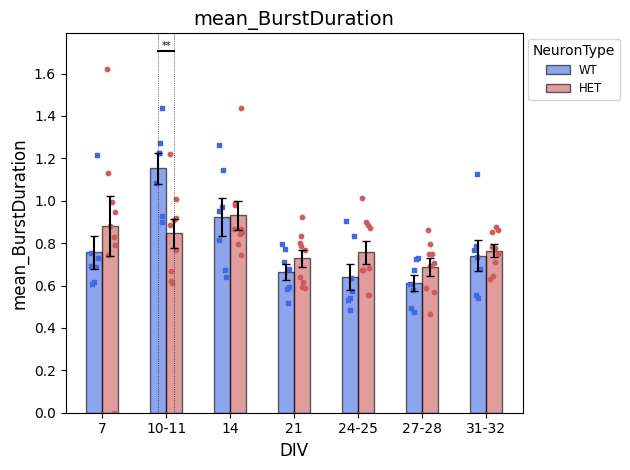

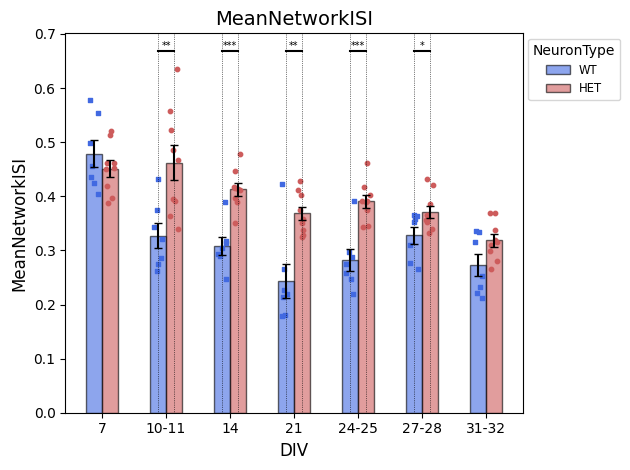

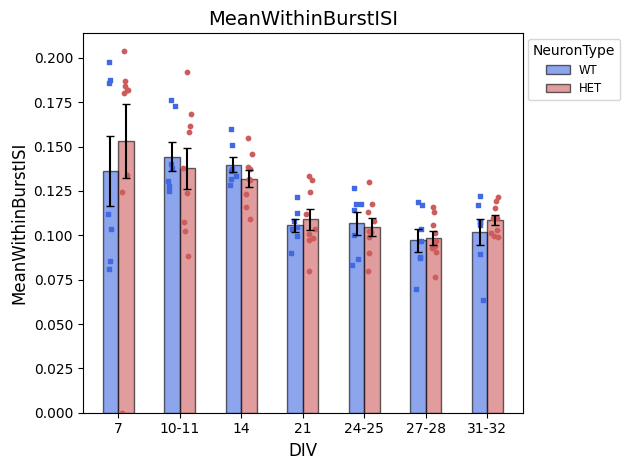

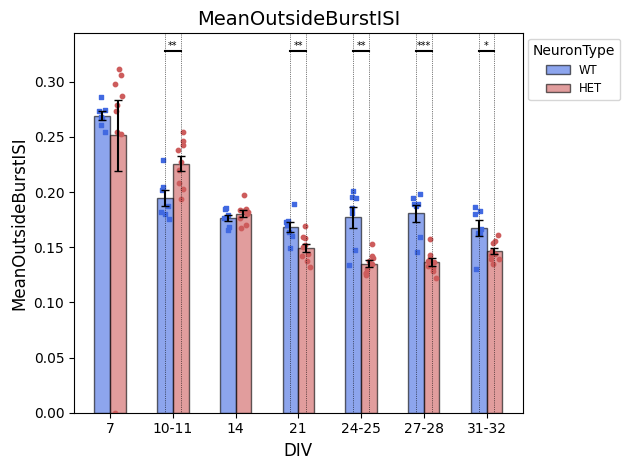

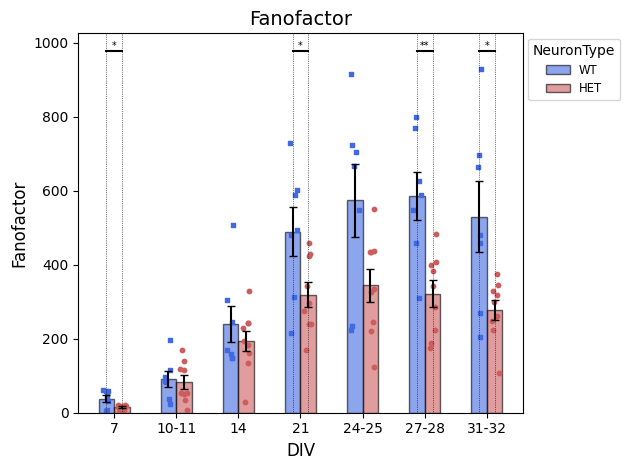

In [ ]:
output_types = ['mean_IBI'
    , 'mean_Burst_Peak',  'Number_Bursts',
       'mean_Spike_per_Burst',
     'mean_BurstDuration','MeanNetworkISI',  'MeanWithinBurstISI',
        'MeanOutsideBurstISI','Fanofactor']





dirpath = '/home/mmp/Documents/ADNP_JUNE2024/ADNP_combined_2and3/'

for output_type in output_types:
    total_genotypes = len(unique_genotypes)
    #output_type='Number_Bursts'
    # Print the number of unique genotypes
    print(f"Number of unique Genotypes: {total_genotypes}")

    # Initialize output arrays for each unique genotype
    output_arrays = {genotype: [] for genotype in unique_genotypes}
    chip_arrays = {genotype: [] for genotype in unique_genotypes}
    well_arrays = {genotype: [] for genotype in unique_genotypes}
    print(unique_genotypes)
    # Fill data from data frame
    for i in div:
        for genotype in unique_genotypes:
            temp_df = df.loc[(df['DIV'] == i) &
                            (df['NeuronType'].str.strip() == genotype)
                            ]
            output_arrays[genotype].append(np.array(temp_df[output_type]))
            chip_arrays[genotype].append(np.array(temp_df['Chip_ID']))
            well_arrays[genotype].append(np.array(temp_df['Well']))
    #print(df)
    # Adjust bar width and gap between them
    bar_width = 0.25  # Adjust as necessary for your specific plot
    gap_between_bars = 0  # Adjust the gap between bars within a group

    # Calculate the total width for all bars in a group
    total_bar_group_width = total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars

    # Create x-coordinates of bars for each genotype group
    x_genotype = {genotype: [] for genotype in unique_genotypes}
    base_x_coordinate = np.arange(len(div))  # Base x-coordinates for each group
    offset = (total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars) / 2
    centered_x = base_x_coordinate - offset + bar_width / 2
    for i, genotype in enumerate(unique_genotypes):
        x_genotype[genotype] = centered_x + i * (bar_width + gap_between_bars)



    # Initialize plot
    fig, ax = plt.subplots()
    # Generate a list of distinct colors based on the number of genotypes
    #colors = [plt.colormaps['Set1'](i) for i in np.linspace(0, 1, len(unique_genotypes))]# Using a colormap to generate colors
    #colors2 = [plt.colormaps['Set2'](i) for i in np.linspace(0, 1, len(unique_genotypes))]#
    # marker_shapes = ['^', 's', 'v', 'D', '+', 'x', '*', 'H', '8']
    # marker_chips={chip:marker_shapes[idx] for idx, chip in enumerate(track_chips)}
    # Plot data for each genotype
    mean_data_all ={}
    yerr_data_all = {}
    n_data_all={}
    #breakpoint()
    #pdb.set_trace()
    for i,genotype in enumerate(unique_genotypes):
        #breakpoint()
        y_data = output_arrays[genotype]
        chipy_data = chip_arrays[genotype]
        welly_data = well_arrays[genotype]
        #print("type: ",type(genotype))
        # Calculate statistics
        mean_data = [np.mean([n for n in yi if np.isfinite(n)]) for yi in y_data]
        yerr_data = [np.std([n for n in yi if np.isfinite(n)], ddof=1)/np.sqrt(np.size(yi)) for yi in y_data]
        n_data = [len(yi) for yi in y_data]
        # Store statistics in dictionaries
        mean_data_all[genotype] = mean_data
        yerr_data_all[genotype] = yerr_data
        n_data_all[genotype] = n_data
        
            
        # Plot bars
        #transparency value 
        alpha_value = 0.5
        ax.bar(x_genotype[genotype], mean_data, yerr=yerr_data, capsize=3, width=bar_width, color=colors[i], edgecolor='black', ecolor='black', label=genotype,alpha=0.6)

        #pdb.set_trace()
        # Plot scatter points
        #breakpoint()
        for j in range(len(x_genotype[genotype])):
            #pdb.set_trace()
            # ax.scatter(x_genotype[genotype][j] + np.zeros(y_data[j].size), y_data[j], s=20,color=colors2[i],marker=marker_chips[chipy_data[j]+str(welly_data[j])] if chipy_data[j]+str(welly_data[j]) in track_chips else 'o')
    # Concatenate corresponding elements from chipy_data[j] and welly_data[j]
            combined_data = [str(chip)+ str(well) for chip, well in zip(chipy_data[j], welly_data[j])]

            # # Check if the concatenated string is in track_chips, and set the marker accordingly
            # markers = [marker_chips.get(chipwell, 'o') for chipwell in combined_data]
            # #marker_chips[combined_data[0]] if combined_data[0] in track_chips else 'o'

            # Use the marker in the scatter plot
            jitter_amount=0.07
            for k in range(len(y_data[j])):
                #pdb.set_trace()
                ax.scatter(
                    x_genotype[genotype][j] + np.random.uniform(-jitter_amount, jitter_amount, 1),
                    y_data[j][k],
                    s=10,
                    color=colors[i],
                    marker=markers[i]
                        )


    # # Calculate maximum y-value for plotting significance
    # max_y = max([max(data) for data in output_arrays.values() if data.size > 0])
    # increment = max_y * 0.1  # Increment to adjust y-position for significance markers

    #Perform and plot t-tests between all pairs of genotype
    #pdb.set_trace()
    for i in range(len(base_x_coordinate)):
        #maxim = max([max( output_arrays[genotype][i] )for genotype in unique_genotypes])
        maxim = max(max(array) for genotype_arrays in output_arrays.values() for array in genotype_arrays)
        count = 1
        p_values = []
        for j, genotype1 in enumerate(unique_genotypes):
            for k, genotype2 in enumerate(unique_genotypes):
                if j < k:
                    #pdb.set_trace()
                    #print("mean_data_all",mean_data_all[genotype1])
                    #print("type:",type(genotype1))
                    mean1, sem1, n1 = mean_data_all[genotype1][i], yerr_data_all[genotype1][i], n_data_all[genotype1][i]
                    mean2, sem2, n2 = mean_data_all[genotype2][i], yerr_data_all[genotype2][i], n_data_all[genotype2][i]
                    #t_stat, p_value = stats.ttest_ind_from_stats(mean1, sem1, n1, mean2, sem2, n2)
                    sed = sqrt(sem1**2.0 + sem2**2.0)
                    t_stat = (mean1 - mean2) / sed
                    # degrees of freedom
                    degreef = n1+n2 - 2
                    alpha=0.05
                    # calculate the critical value
                    cv = stats.t.ppf(1.0 - alpha, degreef)
                    # calculate the p-vallue
                    p_value = (1.0 - stats.t.cdf(abs(t_stat), degreef)) * 2.0
                    p_values.append([mean1,sem1,mean2,sem2,p_value])

                    # Plot significance
                    #maxim = max(np.max(output_arrays[genotype1][i]), np.max(output_arrays[genotype2][i]))
                    x1, x2 = x_genotype[genotype1][i], x_genotype[genotype2][i]
                    
                    sign = "***" if p_value <= 0.001 else "**" if p_value <= 0.01 else "*" if p_value <= 0.05 else "ns"
                    if not sign =='ns':
                        ax.plot([x1, x2], [maxim + 0.05*maxim*(count)] * 2, 'k', linewidth=1.5)
                        ax.text((x1 + x2) / 2, maxim +0.05*maxim*(count), sign, ha='center', va='bottom', fontsize=7)
                        ax.axvline(x1,color='black',linestyle=':',linewidth=0.5)
                        ax.axvline(x2,color='black',linestyle=':',linewidth=0.5)
                    count = count +1

                    


   # Adjustments for plot aesthetics
    plt.title(f"{output_type}", fontsize=14)
    plt.xlabel('DIV', fontsize=12)
    plt.ylabel(f"{output_type}", fontsize=12)
    plt.xticks(base_x_coordinate, div, fontsize=10)
    plt.legend(title='NeuronType', loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
    plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
    #plt.legend(title='NeuronType',loc='upper right', fontsize='x-small', handlelength=2, handletextpad=2, handleheight=2,bbox_to_anchor=(1.0, 1))
    import os 
    
    if not os.path.exists(dirpath):
            os.makedirs(dirpath)
    plt.savefig(f"{dirpath}/{output_type}.svg",dpi=300,format='svg')

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

# Create a PDF file to save all the plots
with PdfPages(f"{dirpath}/all_plots.pdf") as pdf:
    for output_type in output_types:
        total_genotypes = len(unique_genotypes)
        
        # Print the number of unique genotypes
        print(f"Number of unique Genotypes: {total_genotypes}")

        # Initialize output arrays for each unique genotype
        output_arrays = {genotype: [] for genotype in unique_genotypes}
        chip_arrays = {genotype: [] for genotype in unique_genotypes}
        well_arrays = {genotype: [] for genotype in unique_genotypes}
        print(unique_genotypes)
        
        # Fill data from data frame
        for i in div:
            for genotype in unique_genotypes:
                temp_df = df.loc[(df['DIV'] == i) & (df['NeuronType'].str.strip() == genotype)]
                output_arrays[genotype].append(np.array(temp_df[output_type]))
                chip_arrays[genotype].append(np.array(temp_df['Chip_ID']))
                well_arrays[genotype].append(np.array(temp_df['Well']))
        
        # Adjust bar width and gap between them
        bar_width = 0.25  # Adjust as necessary for your specific plot
        gap_between_bars = 0  # Adjust the gap between bars within a group

        # Calculate the total width for all bars in a group
        total_bar_group_width = total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars

        # Create x-coordinates of bars for each genotype group
        x_genotype = {genotype: [] for genotype in unique_genotypes}
        base_x_coordinate = np.arange(len(div))  # Base x-coordinates for each group
        offset = (total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars) / 2
        centered_x = base_x_coordinate - offset + bar_width / 2
        for i, genotype in enumerate(unique_genotypes):
            x_genotype[genotype] = centered_x + i * (bar_width + gap_between_bars)

        # Initialize plot
        fig, ax = plt.subplots(figsize=(8, 6))

        mean_data_all = {}
        yerr_data_all = {}
        n_data_all = {}

        for i, genotype in enumerate(unique_genotypes):
            y_data = output_arrays[genotype]
            chipy_data = chip_arrays[genotype]
            welly_data = well_arrays[genotype]

            # Calculate statistics
            mean_data = [np.mean([n for n in yi if np.isfinite(n)]) for yi in y_data]
            yerr_data = [np.std([n for n in yi if np.isfinite(n)], ddof=1)/np.sqrt(np.size(yi)) for yi in y_data]
            n_data = [len(yi) for yi in y_data]

            # Store statistics in dictionaries
            mean_data_all[genotype] = mean_data
            yerr_data_all[genotype] = yerr_data
            n_data_all[genotype] = n_data

            # Plot bars
            ax.bar(x_genotype[genotype], mean_data, yerr=yerr_data, capsize=3, width=bar_width, color=colors[i], edgecolor='black', ecolor='black', label=genotype, alpha=0.6)

            # Plot scatter points
            for j in range(len(x_genotype[genotype])):
                combined_data = [str(chip)+str(well) for chip, well in zip(chipy_data[j], welly_data[j])]
                jitter_amount = 0.07
                for k in range(len(y_data[j])):
                    ax.scatter(
                        x_genotype[genotype][j] + np.random.uniform(-jitter_amount, jitter_amount, 1),
                        y_data[j][k],
                        s=10,
                        color=colors[i],
                        marker='o'
                    )
        #Perform and plot t-tests between all pairs of genotype
    #pdb.set_trace()
        for i in range(len(base_x_coordinate)):
            #maxim = max([max( output_arrays[genotype][i] )for genotype in unique_genotypes])
            maxim = max(max(array) for genotype_arrays in output_arrays.values() for array in genotype_arrays)
            count = 1
            p_values = []
            for j, genotype1 in enumerate(unique_genotypes):
                for k, genotype2 in enumerate(unique_genotypes):
                    if j < k:
                        #pdb.set_trace()
                        #print("mean_data_all",mean_data_all[genotype1])
                        #print("type:",type(genotype1))
                        mean1, sem1, n1 = mean_data_all[genotype1][i], yerr_data_all[genotype1][i], n_data_all[genotype1][i]
                        mean2, sem2, n2 = mean_data_all[genotype2][i], yerr_data_all[genotype2][i], n_data_all[genotype2][i]
                        #t_stat, p_value = stats.ttest_ind_from_stats(mean1, sem1, n1, mean2, sem2, n2)
                        sed = sqrt(sem1**2.0 + sem2**2.0)
                        t_stat = (mean1 - mean2) / sed
                        # degrees of freedom
                        degreef = n1+n2 - 2
                        alpha=0.05
                        # calculate the critical value
                        cv = stats.t.ppf(1.0 - alpha, degreef)
                        # calculate the p-vallue
                        p_value = (1.0 - stats.t.cdf(abs(t_stat), degreef)) * 2.0
                        p_values.append([mean1,sem1,mean2,sem2,p_value])

                        # Plot significance
                        #maxim = max(np.max(output_arrays[genotype1][i]), np.max(output_arrays[genotype2][i]))
                        x1, x2 = x_genotype[genotype1][i], x_genotype[genotype2][i]
                        
                        sign = "***" if p_value <= 0.001 else "**" if p_value <= 0.01 else "*" if p_value <= 0.05 else "ns"
                        if not sign =='ns':
                            ax.plot([x1, x2], [maxim + 0.05*maxim*(count)] * 2, 'k', linewidth=1.5)
                            ax.text((x1 + x2) / 2, maxim +0.05*maxim*(count), sign, ha='center', va='bottom', fontsize=7)
                            ax.axvline(x1,color='black',linestyle=':',linewidth=0.5)
                            ax.axvline(x2,color='black',linestyle=':',linewidth=0.5)
                        count = count +1

                    
        # Adjustments for plot aesthetics
        plt.title(f"{output_type}", fontsize=14)
        plt.xlabel('DIV', fontsize=12)
        plt.ylabel(f"{output_type}", fontsize=12)
        plt.xticks(base_x_coordinate, div, fontsize=10)
        plt.legend(title='NeuronType', loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
        plt.tight_layout()  # Adjust layout to prevent clipping of ylabel

        # Save the current figure to the PDF
        pdf.savefig(fig)
        plt.close(fig)

print("All plots have been saved to a single PDF file.")

Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
All plots have been saved to a single PDF file.
